In [67]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
pip install openpyxl

You should consider upgrading via the 'c:\Users\Luke\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


- EDA 진행에 앞서 'no_of_adults'와 'no_of_children' 컬럼를 합친 'no_of_people' 컬럼과 arrival_year, arrival_month,	arrival_date 컬럼을 합친 'arrival_year_month_date' 컬럼, 그리고 요일 컴럼을 만들어 보려 합니다. 파이썬으로도 할 수 있지만... 편의상 엑셀로 하겠습니다~

In [69]:
# CSV 파일을 DataFrame으로 불러옵니다.
file_path = r"C:\Users\Luke\Desktop\Dart_B\Toy Project\Hotel Reservations_new.xlsx"

df = pd.read_excel(file_path, engine='openpyxl')

In [70]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_people,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,...,arrival_date,arrival_year_month_date,arrival_day,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN06339,2,10,12,0,2,Meal Plan 1,0,Room_Type 4,37,...,12,2018-01-12,Friday,Online,0,0,0,84.45,1,Not_Canceled
1,INN10062,2,9,11,2,5,Meal Plan 1,0,Room_Type 2,8,...,13,2017-08-13,Sunday,Online,0,0,0,76.50,1,Canceled
2,INN10042,1,9,10,2,1,Meal Plan 1,0,Room_Type 1,11,...,11,2017-10-11,Wednesday,Corporate,0,0,0,95.00,0,Not_Canceled
3,INN05180,3,2,5,0,2,Meal Plan 1,0,Room_Type 2,137,...,30,2018-08-30,Thursday,Online,0,0,0,93.70,1,Not_Canceled
4,INN05658,2,3,5,0,1,Meal Plan 1,0,Room_Type 6,17,...,29,2017-08-29,Tuesday,Online,0,0,0,153.00,2,Not_Canceled


> ## 1. 기초 데이터 파악

Data Dictionary

- Booking_ID: unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.

In [71]:
# info 를 통해 요약정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_people                          36275 non-null  int64  
 4   no_of_weekend_nights                  36275 non-null  int64  
 5   no_of_week_nights                     36275 non-null  int64  
 6   type_of_meal_plan                     36275 non-null  object 
 7   required_car_parking_space            36275 non-null  int64  
 8   room_type_reserved                    36275 non-null  object 
 9   lead_time                             36275 non-null  int64  
 10  arrival_year                          36275 non-null  int64  
 11  arrival_month  

In [72]:
# 결측치 수 확인
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_people                            0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
arrival_year_month_date                 0
arrival_day                             0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

결측치는 없음.

> ### 1-1 간단한 기술통계

In [73]:
# describe 로 기술통계 확인하기
df.describe()

,no_of_adults,no_of_children,no_of_people,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,1.950241,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.650327,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,2.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,12.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


전체 데이터는 36,275개

In [74]:
# object 값 요약  unique: 종류, top: 최빈값, freq: 최빈값의 빈도.
df.describe(include="object")

,Booking_ID,type_of_meal_plan,room_type_reserved,arrival_year_month_date,arrival_day,market_segment_type,booking_status
count,36275,36275,36275,36275,36275,36275,36275
unique,36275,4,7,549,7,5,2
top,INN36269,Meal Plan 1,Room_Type 1,2018-10-13,Sunday,Online,Not_Canceled
freq,1,27835,28130,254,6135,23214,24390


>## 2. 간단한 데이터 전처리


    type_of_meal_plan과 room_type_reserved과 market_segment_type을 레이블 인코딩 처리하고, booking_status을 원-핫 인코딩 처리한다.

In [75]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Luke\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [96]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode 'arrival_day' column specifically with the given mapping
arrival_day_mapping = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
}
df['arrival_day'] = df['arrival_day'].map(arrival_day_mapping)

# Apply label encoding to other specified columns
df['type_of_meal_plan'] = label_encoder.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = label_encoder.fit_transform(df['room_type_reserved'])
df['booking_status'] = label_encoder.fit_transform(df['booking_status'])
df['market_segment_type'] = label_encoder.fit_transform(df['market_segment_type'])





In [97]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_people,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,...,arrival_year_month_date,arrival_day,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_day_encoded
0,INN06339,2,10,12,0,2,0,0,3,37,...,2018-01-12,NaN,4,0,0,0,84.45,1,1,NaN
1,INN10062,2,9,11,2,5,0,0,1,8,...,2017-08-13,NaN,4,0,0,0,76.50,1,0,NaN
2,INN10042,1,9,10,2,1,0,0,0,11,...,2017-10-11,NaN,2,0,0,0,95.00,0,1,NaN
3,INN05180,3,2,5,0,2,0,0,1,137,...,2018-08-30,NaN,4,0,0,0,93.70,1,1,NaN
4,INN05658,2,3,5,0,1,0,0,5,17,...,2017-08-29,NaN,4,0,0,0,153.00,2,1,NaN


In [89]:
encoded_df.head()

,arrival_day,type_of_meal_plan_0,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3,room_type_reserved_0,room_type_reserved_1,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,booking_status_0,booking_status_1,market_segment_type_0,market_segment_type_1,market_segment_type_2,market_segment_type_3,market_segment_type_4
0,NaN,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True
1,NaN,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True
2,NaN,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False
3,NaN,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
4,NaN,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True


In [86]:
df_encoded_sample.head()

,type_of_meal_plan,room_type_reserved,arrival_day_encoded,booking_status,market_segment_type
0,0,3,NaN,1,4
1,0,1,NaN,0,4
2,0,0,NaN,1,2
3,0,1,NaN,1,4
4,0,5,NaN,1,4


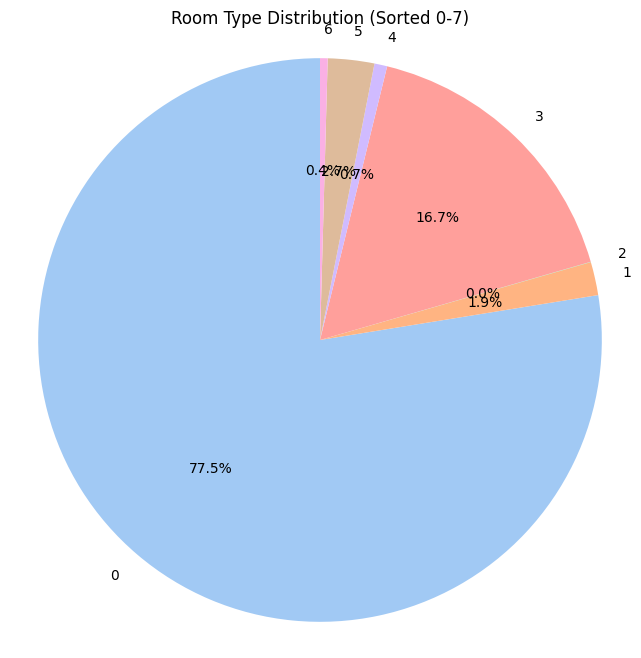

In [79]:
# room_type_reserved 열의 값의 분포를 계산하고, 인덱스를 0부터 7까지의 순서로 정렬
room_type_counts = df_subset['room_type_reserved'].value_counts().sort_index()

# 파이 차트 그리기 (0부터 7까지 순서대로 나타나도록 함)
plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Room Type Distribution (Sorted 0-7)')
plt.axis('equal')  # 파이 차트를 원형으로 만듦
plt.show()

- Room Type 1이 전체 예약의 77.5%(28160개의 예약)로 압도적
- 잘 보이지는 않지만 
  - Room Type 3은 7개의 예약
  - Room Type 5는 265개의 예약
  - Room Type 7은 158개의 예약
  
  이 있다.


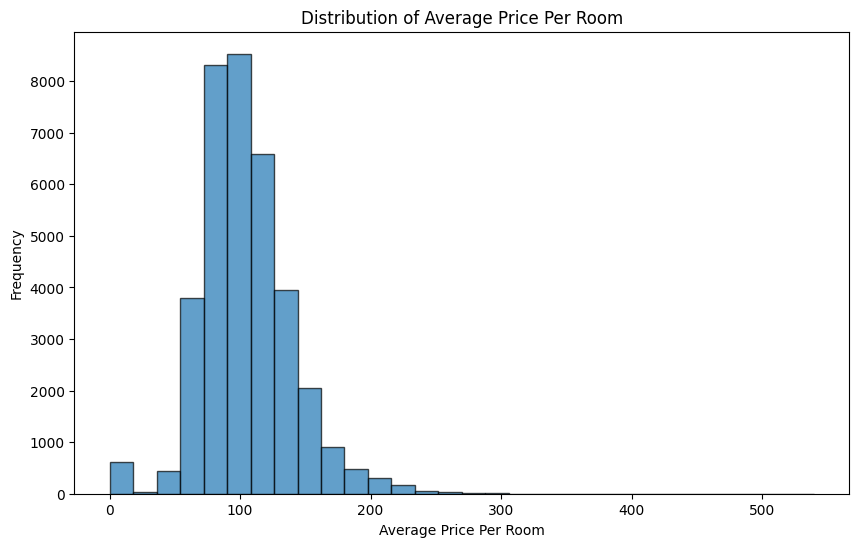

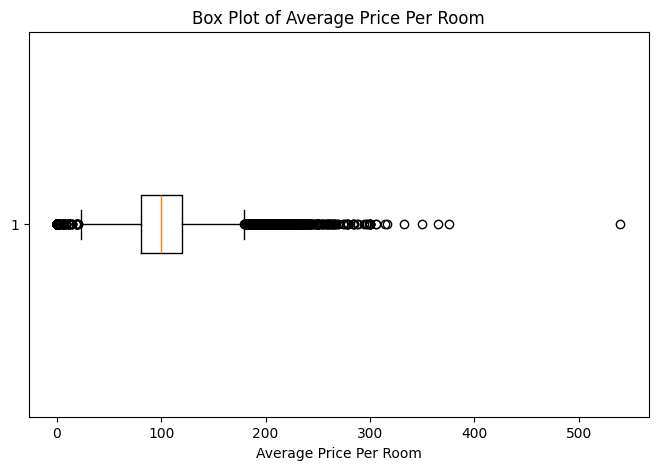

In [80]:
import matplotlib.pyplot as plt

# Extract the 'avg_price_per_room' column
avg_price = df_subset['avg_price_per_room']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(avg_price, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Price Per Room')
plt.xlabel('Average Price Per Room')
plt.ylabel('Frequency')
plt.show()

# Plotting the box plot
plt.figure(figsize=(8, 5))
plt.boxplot(avg_price, vert=False)
plt.title('Box Plot of Average Price Per Room')
plt.xlabel('Average Price Per Room')
plt.show()

In [81]:
# Calculate the 10th percentile of the 'avg_price_per_room' column
percentile_10 = avg_price.quantile(0.10)
percentile_10

np.float64(67.0)

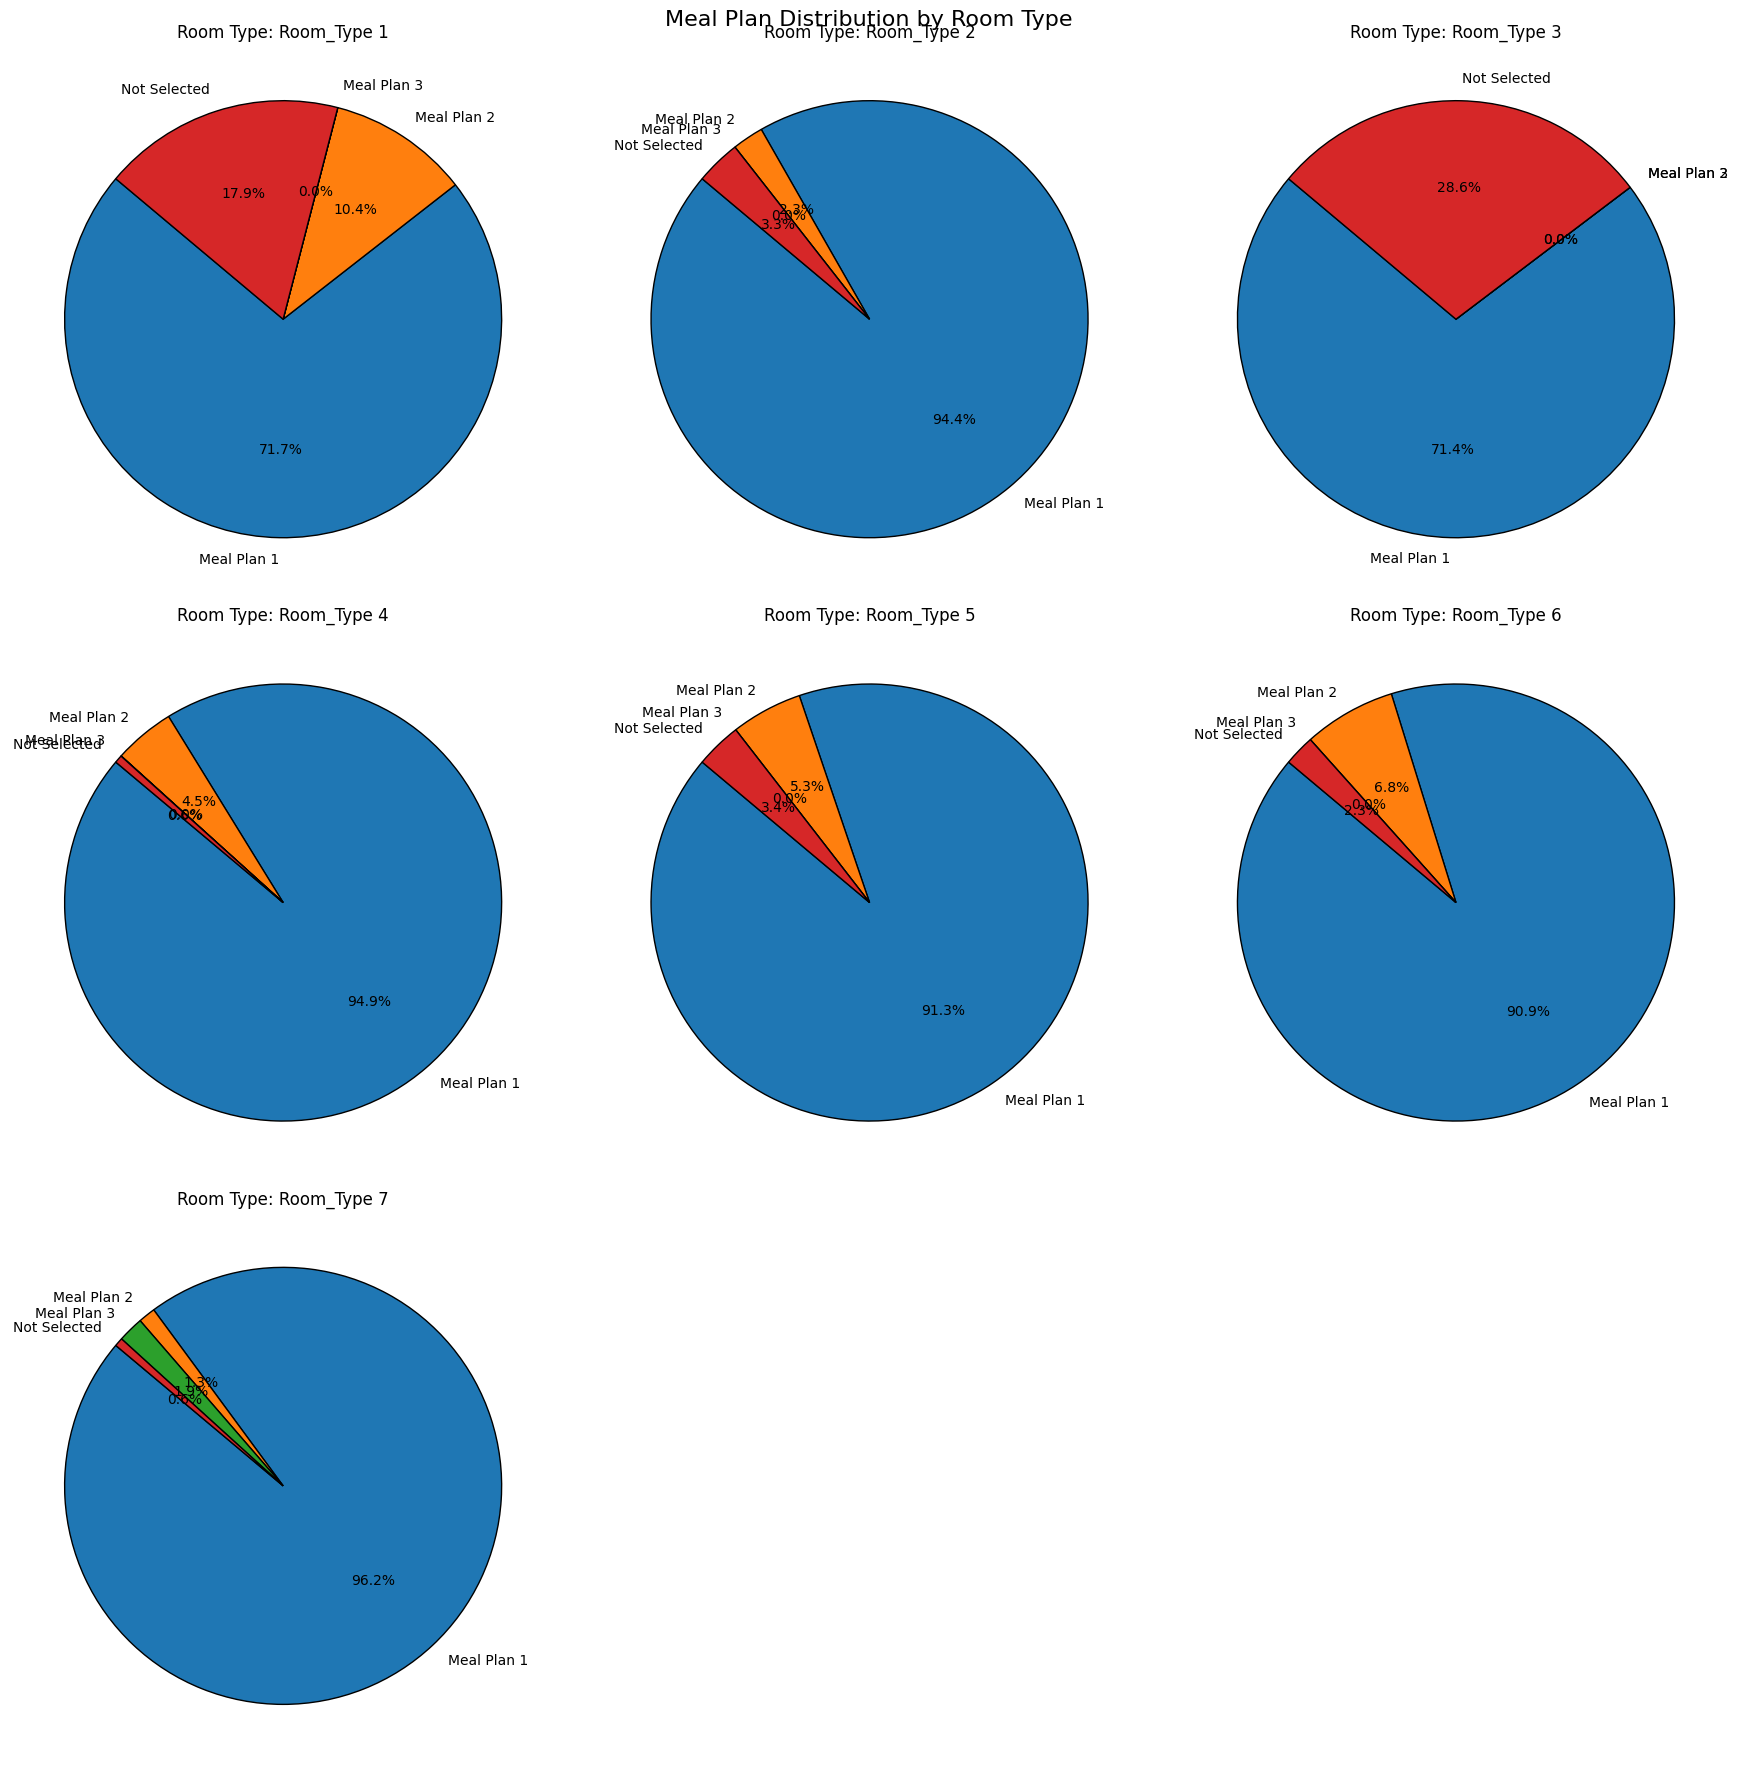

In [82]:
# Group by 'room_type_reserved' and 'type_of_meal_plan' to get the counts
room_meal_counts = df.groupby('room_type_reserved')['type_of_meal_plan'].value_counts().unstack(fill_value=0)

# Plot pie charts for each room type showing the meal plan distribution
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
axes = axes.flatten()

for i, room_type in enumerate(room_meal_counts.index):
    axes[i].pie(room_meal_counts.loc[room_type], labels=room_meal_counts.columns, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
    axes[i].set_title(f'Room Type: {room_type}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Meal Plan Distribution by Room Type', fontsize=16)
plt.tight_layout()
plt.show()

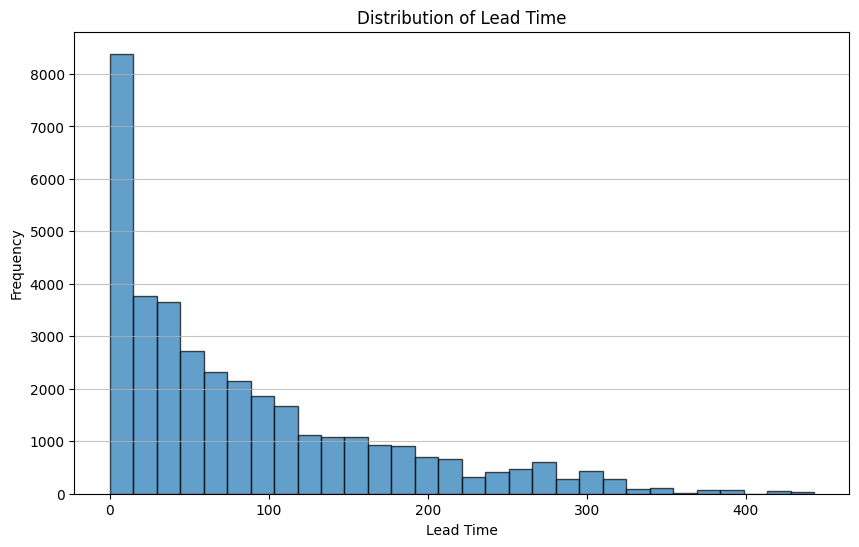

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
hotel_data_latest = pd.read_excel(r"C:\Users\Luke\Desktop\Dart_B\Toy Project\Hotel Reservations_new.xlsx")

# Plotting the histogram for the 'lead_time' column
plt.figure(figsize=(10, 6))
plt.hist(hotel_data_latest['lead_time'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

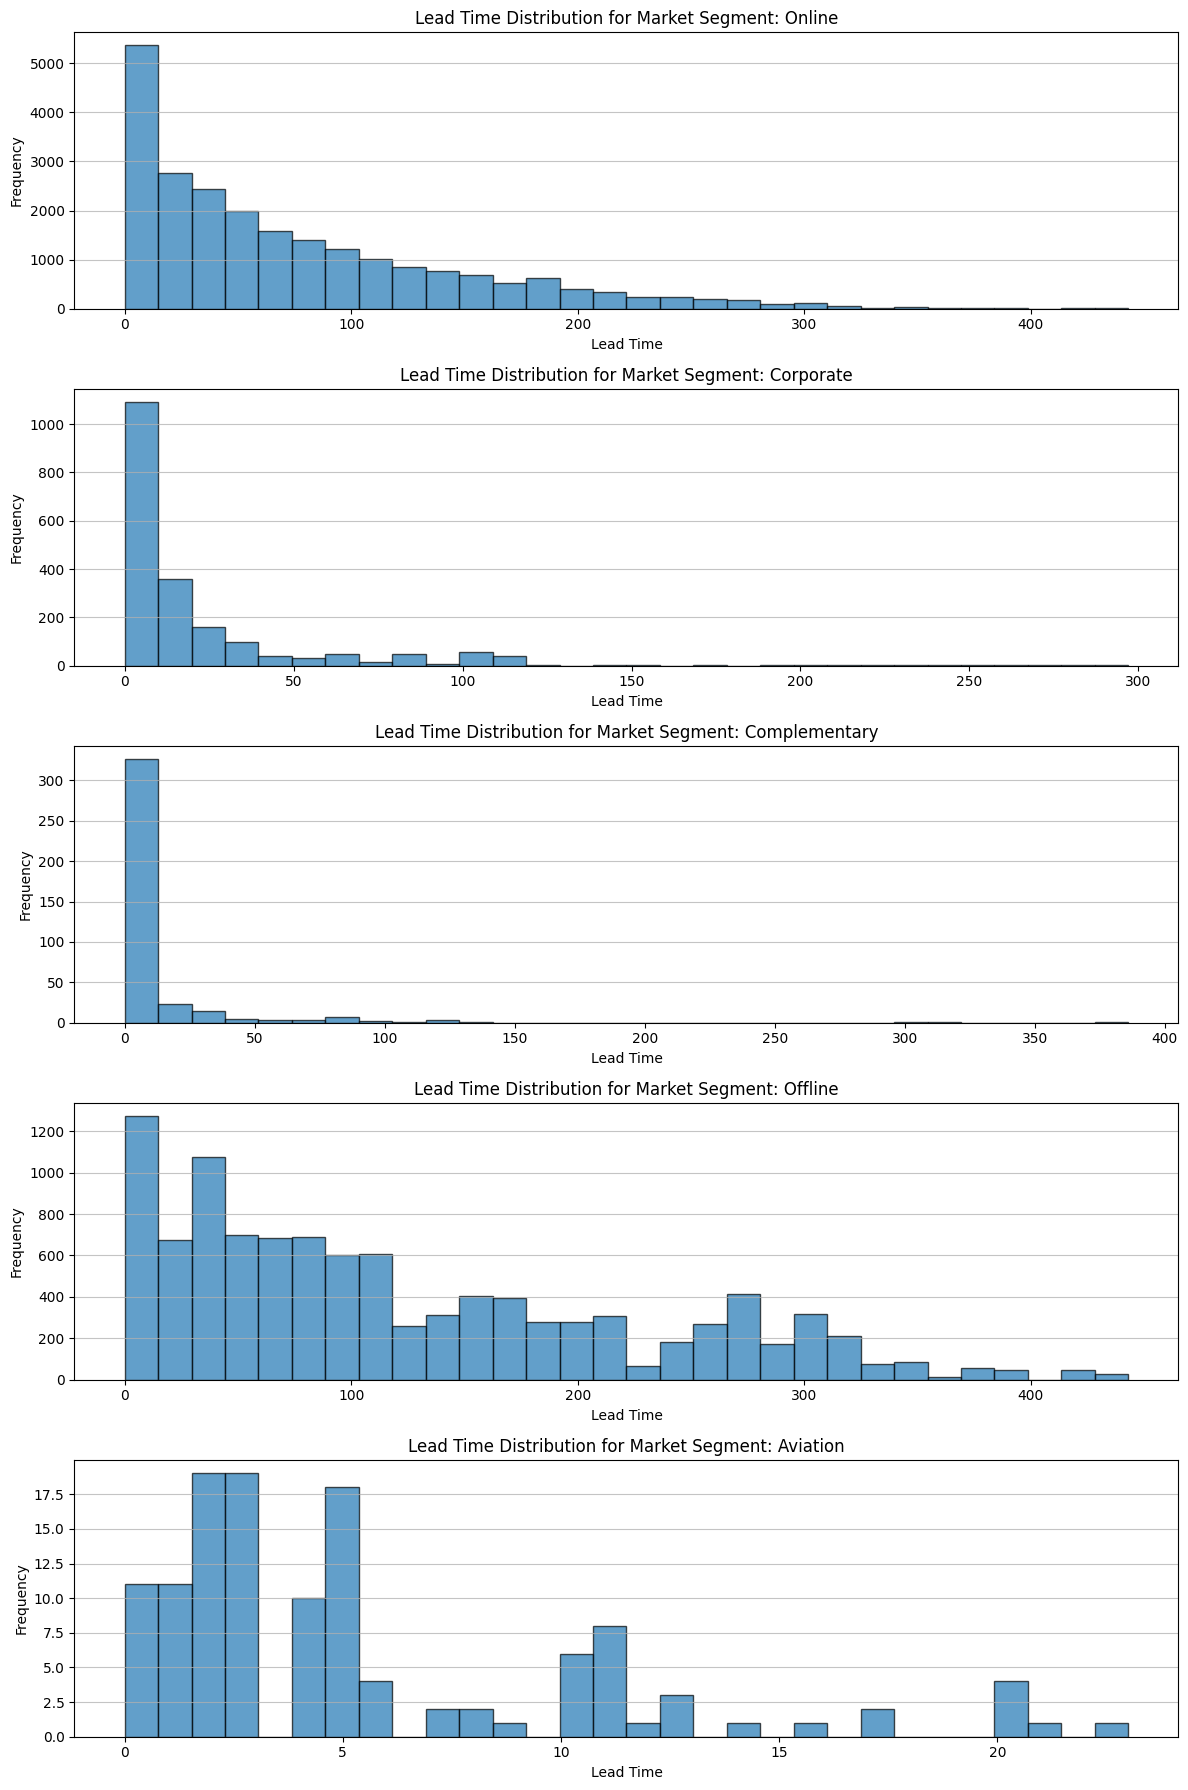

In [100]:
# Get unique market segments
unique_segments = hotel_data_latest['market_segment_type'].unique()

# Create separate histograms for each market segment
plt.figure(figsize=(12, 18))

for i, segment in enumerate(unique_segments, 1):
    plt.subplot(len(unique_segments), 1, i)
    subset = hotel_data_latest[hotel_data_latest['market_segment_type'] == segment]
    plt.hist(subset['lead_time'], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Lead Time Distribution for Market Segment: {segment}')
    plt.xlabel('Lead Time')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()


In [101]:
# lead_time을 시간 기반으로 세분화하는 함수를 정의합니다
def segment_lead_time(days):
    if days <= 7:
        return 'Last-Minute'
    elif days <= 30:
        return 'Short-Term'
    elif days <= 90:
        return 'Mid-Term'
    else:
        return 'Long-Term'

# lead_time에 따라 세분화된 값을 새로운 컬럼에 추가합니다
hotel_data_latest['lead_time_segment'] = hotel_data_latest['lead_time'].apply(segment_lead_time)

# 세분화된 lead_time의 분포를 확인합니다
lead_time_segment_distribution = hotel_data_latest['lead_time_segment'].value_counts(normalize=True) * 100

print(lead_time_segment_distribution)


lead_time_segment
Long-Term      35.972433
Mid-Term       29.813921
Short-Term     18.221916
Last-Minute    15.991730
Name: proportion, dtype: float64


In [102]:
# 'repeated_guest'에 따라 세분화하는 함수 정의
def segment_by_repeated_guest(row):
    if row['repeated_guest'] == 1:
        return 'Repeated Guest'
    else:
        return 'New Guest'

# 새로운 컬럼 'guest_segment'를 추가하여 세분화 정보 저장
hotel_data_latest['guest_segment'] = hotel_data_latest.apply(segment_by_repeated_guest, axis=1)

# 각 세분화된 그룹별로 lead_time의 통계량을 확인
lead_time_by_guest_segment = hotel_data_latest.groupby('guest_segment')['lead_time'].describe()

print(lead_time_by_guest_segment)

                  count       mean        std  min   25%   50%    75%    max
guest_segment                                                               
New Guest       35345.0  87.127995  86.041224  0.0  19.0  60.0  130.0  443.0
Repeated Guest    930.0  13.195699  36.580189  0.0   1.0   4.0   11.0  361.0


In [104]:
# Let's plot the distribution of the 'lead_time' column to examine if it follows a long tail distribution
lead_time_data = df_encoded_sample['lead_time']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(lead_time_data, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.yscale('log')  # Use log scale for better visualization of the long tail
plt.grid(True)
plt.show()

KeyError: 'lead_time'

10th Percentile or below: 3일 이하
11th-25th Percentile: 4일 ~ 17일
26th-50th Percentile: 18일 ~ 57일
51st-75th Percentile: 58일 ~ 126일
76th-90th Percentile: 127일 ~ 213일
Above 90th Percentile: 214일 이상

전체 세그먼트 비율:
10th Percentile or below: 전체의 10.06%
11th-25th Percentile: 전체의 15.38%
26th-50th Percentile: 전체의 24.74%
51st-75th Percentile: 전체의 24.85%
76th-90th Percentile: 전체의 15.14%
각 세그먼트 내 "market_segment_type"의 비중 (%):
10th Percentile or below:

Aviation: 1.64%
Complementary: 6.52%
Corporate: 17.11%
Offline: 13.93%
Online: 60.80%
11th-25th Percentile:

Aviation: 1.06%
Complementary: 1.77%
Corporate: 14.04%
Offline: 15.65%
Online: 67.48%
26th-50th Percentile:

Aviation: 0.07%
Complementary: 0.37%
Corporate: 4.08%
Offline: 25.06%
Online: 70.43%
51st-75th Percentile:

Aviation: 0.00%
Complementary: 0.19%
Corporate: 2.44%
Offline: 31.51%
Online: 65.86%
76th-90th Percentile:

Aviation: 0.00%
Complementary: 0.02%
Corporate: 0.18%
Offline: 35.18%
Online: 64.62%
이 결과를 통해 리드 타임이 증가함에 따라 각 세그먼트의 비율과 "market_segment_type"의 변화를 확인할 수 있습니다. ​

각 리드 타임 세그먼트별 예약 취소율은 다음과 같습니다:

10th Percentile or below: 7.48%
11th-25th Percentile: 14.58%
26th-50th Percentile: 22.53%
51st-75th Percentile: 32.88%
76th-90th Percentile: 56.96%

### Room Type 1

- 가장 많은 예약의 비중을 차지하는 객실 타입 (**78.13%**, 18,996건)
- 평균가격 93.5유로
- 이전 예약 수 평균 0.249건 (3위)
- 평균 투숙기간 3.8일 (4위)
- 평일 2.05밤/주말 0.74밤 (둘다 평균)
- 투숙 인원 평균 1.78인 (적은 편)
- 특수 요청 0.67 (적은 편)
- 리드타임 60.3일 (긴 편)
- 온라인>오프라인>기업 순으로 많이 나감. 기업이 선호하는 객실 유형인듯

→ 가장 많은 사람들이 이용하고 이용 인원이 적으며 가격도 적당함. 가장 무난한 객실 타입이 아닐까 

### Room Type 4

- 두번째로 많은 예약의 비중 차지 (16.37%, 3979건)
- 평균가격 121.8유로 (조금 비쌈)
- 이전 예약 수 평균 0.091 (낮은 편)
- 평균 투숙기간 3.34일 (가장 길다)
- 평일 2.43밤(가장 길다)/주말 0.9밤(긴편)
- 투숙 인원 평균 2.19명
- 특수요청 1.05 (조금 많음)
- 리드타임 55.79 (조금 김)
- 온라인 > 오프라인 > 기업

→ 룸 타입 1이랑 같이 꽤 무난하게 팔리는 방. 룸 1에 비해 가격도 조금 높고 평균 투숙인원, 특수요청도 많은 편. 

### Room Type 6

- 전체 예약의 2.29%(558건)
- 평균 가격 177.9유로 (비ㅣㅣ쌈)
- 이전 예약 0.136(낮은 편)
- 투숙 기간 2.85일
- 평일 2.09일, 주말 0.76일
- 투숙 인원 3.6 (많음, 큰 방인듯)
- 특수요청 1.27(많은 편, 사람이 많아서?)
- 리드타임 39.2
- 온라인>오프라인>제휴 (온라인이 압도적)

→ 큰 방, 온라인이 대부분이고 기업고객 거의 없음. 인원이 많고 가격이 비싸고 특수요청이 많은 편. 대부분 여행일듯

### Room Type 2

- 전체 예약의 1.9%(462건)
- 평균 가격 83.1유로 (저렴한 편)
- 이전 예약 수 평균 0.052 (낮음)
- 평균 투숙기간 3.13일 (김)
- 평일 2.17일/주말 0.95일 (주말이 매우 길다)
- 투숙 인원 평균 2.11명 (비슷한 투숙 인원을 가진 룸4에 비해 저렴하다)
- 특수 요청 0.92
- 리드타임 74.07 (가장 김)
- 온라인>오프라인>제휴

→ 방 크기에 비해 가성비가 좋아서 사람들이 예약하고싶어 하는 객실인 것 같음 (희귀매물,,?)

### Room Type 5

- 예약의 0.79%(193건)
- 평균 가격 118.3유로
- 이전 예약 수 평균 0.756 (높은 편)
- 평균 투숙기간 2.73일
- 평일 2.04일/주말 0.68일
- 투숙 인원 평균 1.9명
- 특수 요청 0.4(낮음)
- 리드타임 35.54(짧음)
- 온라인>오프라인>제휴

→ 기업 고객의 비중이 높고 재방문률도 높음. 기업 고객의 비율로 높아서 특수요청수도 낮음

*참고: 온라인예약과 제휴 고객은 특수요청이 많지만, 기업고객과 오프라인 예약은 특수요청이 적음.

→ 기업고객과 오프라인의 경우 잠만 자고, 온라인, 제휴는 놀러오는듯

→ 근데 왜 오프라인 고객의 리드타임이 길지??

### Room Type 7

- 예약의 0.5%(121건)
- 평균 가격 134.9유로 (비쌈)
- 이전 예약 수 평균 1.57 (매우 높음)
- 투숙 기간 2.61(짧은 편)
- 평일 1.9일/주말 0.64일 (평일이 짧음)
- 투숙 인원 평균 2.8명 (많음)
- 특수요청 1.46(가장 많음)
- 리드타임 27.69(가장 짧음)
- 온라인>제휴>기업

→ 재방문률이 높고 특수요청을 많이 시킴. 리드타임이 짧음(스위트룸이나 프리미엄 객실일거같음)

### Room Type 3

- 예약의 0.02%(5건)..사실 너무 적어서..
- 평균 가격 61유로 (왤캐 싸)
- 이전 예약 x
- 투숙기간 2.6(짧음)
- 평일 2.2일/주말 0.4일(주말은 거의 없음)
- 인원 1.4명(적음)
- 특수요청 0.2(적음)
- 리드타임 38.2(짧음)
- 오프라인=제휴>기업

→ 비즈니스호텔같은 느낌의 객실인가…? 잠만 자는 싼 객실인듯

### 정리

1: 가장 많은 사람들이 이용하고 이용 인원이 적으며 가격도 적당함. 가장 무난한 객실 타입이 아닐까 

2: 방 크기에 비해 가성비가 좋아서 사람들이 예약하고싶어 하는 객실인 것 같음 (희귀매물,,?)

3: 비즈니스호텔같은 느낌의 객실인가…? 잠만 자는 싼 객실인듯

4: 룸 타입 1이랑 같이 꽤 무난하게 팔리는 방. 룸 1에 비해 가격도 조금 높고 평균 투숙인원, 특수요청도 많은 편. 

5: 기업 고객의 비중이 높고 재방문률도 높음. 기업 고객의 비율로 높아서 특수요청수도 낮음

6: 큰 방, 온라인이 대부분이고 기업고객 거의 없음. 인원이 많고 가격이 비싸고 특수요청이 많은 편. 대부분 여행일듯

7: 재방문률이 높고 특수요청을 많이 시킴. 리드타임이 짧음(스위트룸이나 프리미엄 객실일거같음)

> ## 가설설정

>> 예약한 기간(lead_time) 값이 클수록 저렴?
투숙 요일, 재방문 고객

> #아쉬운 점: Offline 예약 경로가 잘 설명되지 않아있어 방문 예약인지, 전화 예약인지, 우편 예약인지 알기가 어려웠다.